In [32]:
import pandas as pd
import numpy as np
import requests
import spacy
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium import plugins
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas 
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-----------
| Fecha_hora                        | fecha y hora de los ataques                                                |categorica ordinal| importante        |                     |
| IP Origen                         | Ip origen de los ataques                                                   |numerica dis.     | target              |                    
| Destino IP                        | Ip destino de los ataques                                                  |numerica discreta |  target             |                    
| Puerto_origen                     | Puerto a traves del cual parten la Ip de los ataques                       |numérica discreta |                     | NaN        
| Puerto_destino                    | Puerto a traves del cual llegan las Ip de los ataques                      |numérica discreta |                     | NaN             
| Protocolo                         | capas de transportes IP: ICMP/UDP/TCP.                                     |categorica ordinal|                     |                    
| Longitud_paquete                  | tamaño del paquete de datos que se está transmitiendo a través de una red  |numerica discreta |                     |se expresa en Bytes 
| Tipo_paquete                      | clasificación del paquete de datos que se está transmitiendo por la red    |binaria           |                     |                    
| Tipo                              |prot. usados en redes de computadoras para realizar funciones específicas   |categórica ordinal|                     |http dns Ftp        
| Datos_carga_util                  | datos de un paquete de red necesarios para la transmisión efectiva         |categórica ordinal|                     |                   | Indicadores_malware               | patrones  identiicar la presencia o actividad maliciosa en la red         |categórica ordinal|                     |              
| Puntuaciones_anomalías            | patrones que se generan mediante IAs que sobrepasan el umbral permimitido  |numérica discreta |                     |                    
| Alertas_advertencias              | notificaciones diseñadas para informar sobre situaciones críticas          |categórica ordinal|  **ELIMINADA**       |NaN-Alert Triggered
| Tipo_ataque                       | ataque informático basada en la naturaleza, el método y los objetivos      |categórica ordinal|                     |                    
| Firma_ataque                      | patróne de características identificables asociados a un tipo ataque       |binaria           |                     |                    
| respuesta_tomada                  | acciones de seguridad en respuesta a un evento o a un ataque detectado     |categórica ordinal|                     |                    
| Nivel_severidad                   | indican la gravedad o importancia de una alerta o evento                   |categórica ordinal|                     |                    
| Informacion_usuario               | datos y detalles relacionados con un usuario en un sistema o plataforma    |categórica ordinal|                     |                    
| Informacion_dispositivo           | identificar el navegador y el S.O desde el cual se realiza una solicitud   |categórica ordinal| importante          | datos navegador    
| Segmento_red                      | objetivo de mejorar la eficiencia, la seguridad y la administración - red  |categórica ordinal|                     |                    
| Datos_geolocalización             | Ubicacion de las direcciones IP origen y destino de los ataques            |categórica ordinal|  Target             |                   
| Información_proxy                 | intermediario ente los usuarios y los servidores                          |numérica continua |                     |        NaN          
| Registros_cortafuegos             | registros detallados de las actividades y eventos de una firewall          |categorica ordinal|                     |                    
| Alertas IDS / IPS                 |notificaciones de sistemas en respuesta a patrones de act. maliciosas       |categórica ordinal|**ELIMINADA**  |\n",
| Fuente_registro                   |fuente o origen de la información registrada en un registro o log           | binaria          |                     |                   

En registro de contrafuegos, la clave 'log data' contiene los datos que se registraron durante la detección del ataque, aportando datos como:<br>
    
    1. información sobre el dispositivo:  dirección IP, nombre de host, sistema operativo, modelo de dispositivo, etc.
    2. Información sobre la actividad sospechosa: dirección URL a la que se accedió, método HTTP utilizado, encabezados HTTP,etc<br>

    La clave log data es una información valiosa que puede utilizarse para investigar y resolver incidentes pudiendo  identificar el origen del mismo, determinar la naturaleza del ataque y tomar medidas para minimizar el riesgo
    

 En registro de contrafuegos, la clave 'log data' contiene los datos que se registraron durante la detección del ataque, aportando datos como:<br>
    
    1. información sobre el dispositivo:  dirección IP, nombre de host, sistema operativo, modelo de dispositivo, etc.
    2. Información sobre la actividad sospechosa: dirección URL a la que se accedió, método HTTP utilizado, encabezados HTTP,etc<br>
    
    La clave log data es una información valiosa que puede utilizarse para investigar y resolver incidentes pudiendo  identificar el origen del mismo, determinar la naturaleza del ataque y tomar medidas para minimizar el riesgo.

    La fuente del registro en un ataque se refiere al dispositivo o servicio que generó el registro, pudiendo ser  la fuente del registro puede ser el propio cortafuegos o un dispositivo o servicio conectado al cortafuegos.En algunos casos, la fuente del registro puede ser un dispositivo o servicio desconocido."
  
    La información del proxy que se puede recopilar en un ataque incluye lo siguiente:

    1. Dirección IP del proxy: Esta información puede utilizarse para identificar el servidor proxy que utilizó el atacante.
    2. Puerto del proxy: Esta información puede utilizarse para identificar el puerto que utilizó el atacante para conectarse al servidor proxy.
    3. Nombre de host del proxy: Esta información puede utilizarse para identificar el nombre del servidor proxy que utilizó el atacante.
    4. País del proxy: Esta información puede utilizarse para identificar la ubicación del servidor proxy que utilizó el atacante."<br>
  
    Los segmentos de red son una parte aislada o separada de una red. Se utilizan para dividir una red en áreas más pequeñas, lo que puede ayudar a mejorar la seguridad, el rendimiento y la administración de la red."<br>
 
    En respuesta tomada:<br>
    1. Logged: La actividad se registró en los registros de seguridad, pero no se tomaron otras acciones.
    2. Blocked: La actividad se bloqueó, lo que significa que se impidió que se completara.
    3. Ignored: La actividad se ignoró, lo que significa que no se tomó ninguna acción.<br>
    En general, los valores \"Logged\", \"Blocked\" e \"Ignored\" son una forma de los sistemas de seguridad de informar sobre las acciones que se tomaron en respuesta a una determinada actividad de red<br>
  
    Los indicadores de malware (IOC) son datos o eventos que pueden indicar la presencia de malware en un sistema o red, siendo herramientas importantes para la detección, el análisis y la respuesta a incidentes de malware<br>
    Las categorías más comunes de IOC son:

    1. Direcciones IP: Las direcciones IP de los servidores de comando y control (C&C) utilizados por el malware.
    2. Nombres de dominio: Los nombres de dominio de los servidores de C&C utilizados por el malware.
    3. Hashes: Los hashes de los archivos maliciosos
    4. Comandos y cadenas: Los comandos y cadenas que se utilizan para controlar el malware.
    5. Comportamiento: El comportamiento del malware, como el tráfico de red que genera o los archivos que modifica."

    

In [11]:
# intentar conseguir informacion de la columna datos carga util con malwarebytes usando la vesrsion original no traducida.\n",
df_original=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks\cybersecurity_attacks.csv")

In [12]:
df_original

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [9]:
# intentar conseguir informacion de la columna datos carga util con malwarebytes usando la vesrsion original no traducida.\n",HE CONSEGUIDO ALGO

# Carga tu DataFrame
df_original=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks\cybersecurity_attacks.csv")

#nombre de la columna sea correcto
columna_datos_carga_util = 'Payload Data'

# Configura tu clave de API de VirusTotal
api_key = 'f5645a04e88d4d459e1564e47b92311af38b498966457e5bbbb4b8a8c41ea71e'

# Carga el modelo de spaCy para procesamiento de texto en inglés
nlp = spacy.load('en_core_web_sm')

# Define una función para analizar el texto con spaCy
def analyze_text(text):
    # Procesa el texto con spaCy
    doc = nlp(text)

    # Aquí puedes realizar análisis adicional según tus necesidades
    # Por ejemplo, verificar entidades, partes del discurso, etc.

    # Devuelve información de interés
    return {'entidades': [ent.text for ent in doc.ents], 'partes_del_discurso': [token.pos_ for token in doc]}

# Aplica la función de análisis a la columna 'Datos_carga_util'
df_original['Resultado_analisis'] = df_original[columna_datos_carga_util].apply(analyze_text)

# Guarda el DataFrame original con los resultados en formato Excel
df_original.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx', index=False)




In [14]:
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")

In [15]:
df_resultado_pay_load

,Resultado_analisis
0,"{'entidades': [], 'partes_del_discurso': ['PRO..."
1,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C..."
2,"{'entidades': ['quae'], 'partes_del_discurso':..."
3,"{'entidades': ['porro labore', 'Minima', 'fugi..."
4,"{'entidades': ['nisi', 'Animi', 'illo repellen..."
...,...
39995,"{'entidades': ['Quibusdam', 'Beatae', 'Quas co..."
39996,"{'entidades': ['Quaerat', 'Accusantium', 'sint..."
39997,"{'entidades': ['Dolorem', 'minima', 'quam duci..."
39998,"{'entidades': ['Officiis', 'tempora adipisci',..."


In [21]:
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")


# Características (X)
X = df_resultado_pay_load['Resultado_analisis']

# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Determinar el número óptimo de clústeres usando K-means
silhouette_scores = []
possible_k_values = range(2, 11)  # Puedes ajustar el rango según tu caso
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_tfidf, labels))

# Elegir el número óptimo de clústeres (aquí, el número con el mayor índice de silueta)
optimal_k = possible_k_values[silhouette_scores.index(max(silhouette_scores))]

# Entrenar K-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_tfidf)

# Etiquetar las muestras como 'normal' o 'anómala' según la distancia al centroide
df_resultado_pay_load['Etiqueta'] = kmeans.predict(X_tfidf)
df_resultado_pay_load['Etiqueta'] = df_resultado_pay_load['Etiqueta'].apply(lambda x: 'anómala' if x == 1 else 'normal')

# Guardar el DataFrame con las etiquetas
df_resultado_pay_load.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx", index=False)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

In [30]:
df_resultado_sklearn= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx")
df_resultado_sklearn

,Resultado_analisis,Etiqueta
0,"{'entidades': [], 'partes_del_discurso': ['PRO...",normal
1,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",anómala
2,"{'entidades': ['quae'], 'partes_del_discurso':...",anómala
3,"{'entidades': ['porro labore', 'Minima', 'fugi...",normal
4,"{'entidades': ['nisi', 'Animi', 'illo repellen...",normal
...,...,...
39995,"{'entidades': ['Quibusdam', 'Beatae', 'Quas co...",normal
39996,"{'entidades': ['Quaerat', 'Accusantium', 'sint...",anómala
39997,"{'entidades': ['Dolorem', 'minima', 'quam duci...",anómala
39998,"{'entidades': ['Officiis', 'tempora adipisci',...",anómala


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


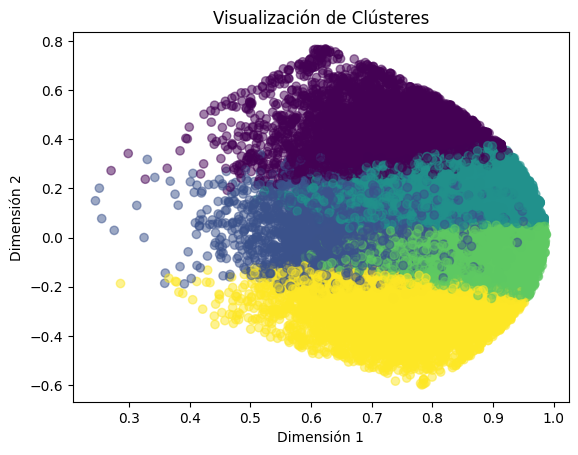

In [27]:
# GENERO UN GRAFICO DE DENSIDAD PARA SABER LA AGRUPACION DE PALABRAS EN EL TEXTO  Y QUE TENGAN CIERTA SIMILITUD PARA DETCETAR LAS ANOMALIAS
# Carga tu DataFrame
df_resultado_pay_load=pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis_Datos_carga_util.xlsx")

# Seleccionar la columna de interés
X = df_resultado_pay_load['Resultado_analisis']

# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Reducir la dimensionalidad usando TruncatedSVD (puedes ajustar el número de componentes)
n_components = 50
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_tfidf)

# Aplicar k-means para agrupar los textos
n_clusters = 5  # Puedes ajustar este valor según tu necesidad
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_resultado_pay_load['Cluster'] = kmeans.fit_predict(X_svd)

# Visualizar los resultados (solo para análisis exploratorio)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df_resultado_pay_load['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualización de Clústeres')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

ValueError: 'c' argument has 40028 elements, which is inconsistent with 'x' and 'y' with size 40000.

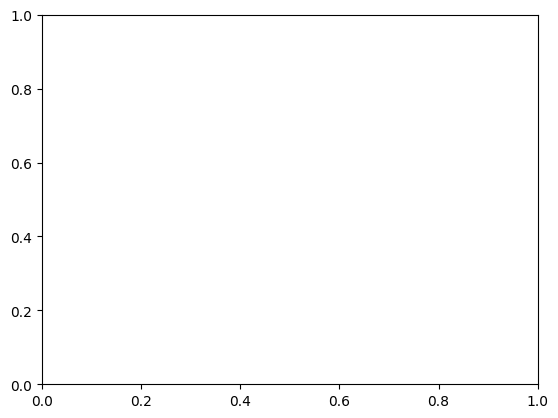

In [42]:
#CRUZO LA INFORMACION RESULTANDOT DEL EXCEL RESULTADO ANALISIS 2 CON EL GRAFICO DE DENSIDAD PARA VER QUE COLOR TIENE CADA ETIQUETA

# Leer el DataFrame resultante del análisis de clústeres
df_resultado_sklearn= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\resultados_analisis2.xlsx")


# Cruzar el resultado del análisis de clústeres con las etiquetas
df_resultado_pay_load = pd.merge(df_resultado_pay_load, df_resultado_sklearn[['Resultado_analisis', 'Etiqueta']], on='Resultado_analisis', how='left')

# Visualización cruzada
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df_resultado_pay_load['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualización de Clústeres')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()





